# A computational introduction to stochastic differential equations.

Lecture 4.

https://github.com/spdes/computational-sde-intro-lecture.

Parameter estimation using maximum likelihood.

In [1]:
import math
import numpy as np
import scipy.stats
import scipy
import matplotlib.pyplot as plt

np.random.seed(666)

In [2]:
def drift(x, theta):
    return theta * np.sin(x)

def dispersion(_):
    return np.array(1.)

def cond_mean_variance_euler_maruyama(x, dt, theta):
    return x + drift(x, theta) * dt, dispersion(x) ** 2 * dt

In [3]:
dt = 1e-3
T = 100000
ts = np.linspace(dt, dt * T, T)

x0 = 0.

# Set the true parameter value
true_theta = 1.

# Generate a trajectory based on the true parameter
xs = np.zeros((T, ))
xis = np.random.randn(T, )
x = x0
for i in range(T):
    x += drift(x, true_theta) * dt + dispersion(x) * math.sqrt(dt) * xis[i]
    xs[i] = x

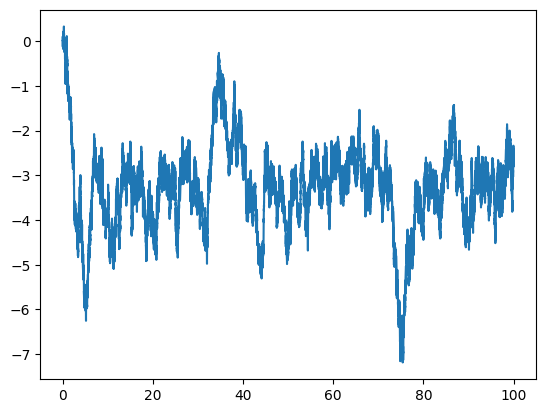

In [9]:
# Take a look at the trajectory
_ = plt.plot(ts, xs)

In [4]:
def objective_func(theta):
    r"""Recall the Markov property to factorise log p(x_{1:T}). Using Euler--Maruyama to approximate the transition densities.
    """
    cond_means, cond_variances = cond_mean_variance_euler_maruyama(xs[:-1], dt, theta)
    log_pdfs = -np.sum(scipy.stats.norm.logpdf(xs[1:], cond_means, cond_variances))
    return log_pdfs

In [7]:
# Solve the optimisation problem using L-BFGS-B
init_theta = np.array(0.)
solution = scipy.optimize.minimize(x0=init_theta, method='L-BFGS-B', fun=objective_func)
print(f'Estimated parameter: {solution.x} vs true parameter {true_theta}')

Estimated parameter: [1.07201246] vs true parameter 1.0
